# introduction :
- Examine transaction data – look for inconsistencies, missing data across the data set, outliers, correctly identified category items, numeric data across all tables. If you determine any anomalies make the necessary changes in the dataset and save it. Having clean data will help when it comes to your analysis. 

- Examine customer data – check for similar issues in the customer data, look for nulls and when you are happy merge the transaction and customer data together so it’s ready for the analysis ensuring you save your files along the way.

- Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

- Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative and form an overall conclusion based on your analysis. 

# about the dataset
- LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

- PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

- Pro analytics Tip: While the data set would not normally be considered large some operations may still take some time to run. 

# Data analysis and customer segments – in your analysis make sure you define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends and/or insights you find. These will all form part of our report to Julia. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import sweetviz 
import seaborn as sns
%matplotlib inline

In [2]:
Trans_data = pd.read_csv("H:\\Level 4 Information Systems\\Projects\\Quantium\\QVI_transaction_data.csv")
Cust_data = pd.read_csv("H:\\Level 4 Information Systems\\Projects\\Quantium\\QVI_purchase_behaviour.csv")

In [3]:
Trans_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
Cust_data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# Analytical View & Data Quality Stage

In [5]:
#Let's check if there are any missing values in our dataset 
print("Check missing values in Transaction dataset :")
print("--------------------------------------------")
print(Trans_data.isnull().sum())
print("Check missing values in Customer dataset :")
print("----------------------------------------")
print(Cust_data.isnull().sum())

Check missing values in Transaction dataset :
--------------------------------------------
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
Check missing values in Customer dataset :
----------------------------------------
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [6]:
#check if their is duplication in the data
print("Numer of dublication in Transacation data = ",Trans_data.duplicated().sum())
print("Numer of dublication in Customer data = ",Cust_data.duplicated().sum())

Numer of dublication in Transacation data =  1
Numer of dublication in Customer data =  0


                                             |                                             | [  0%]   00:00 ->…


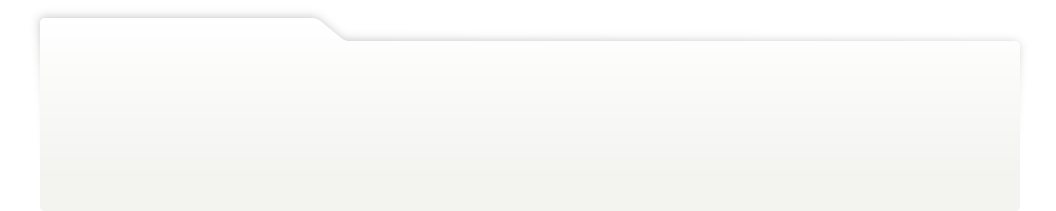
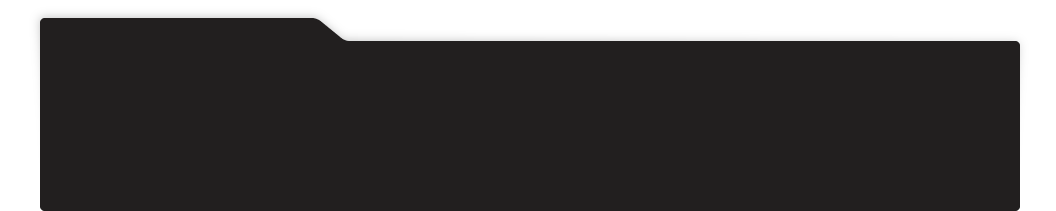
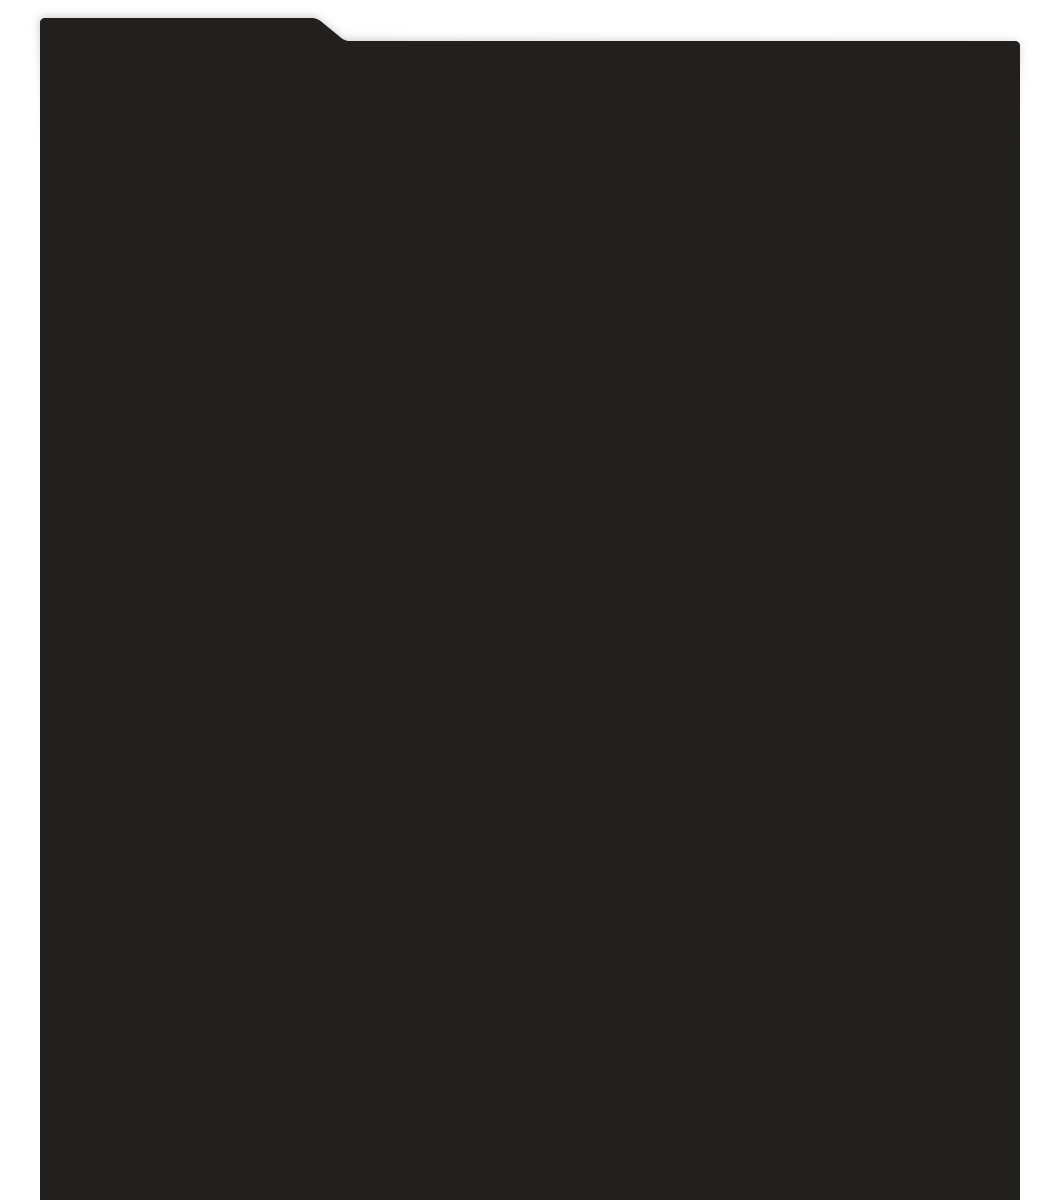
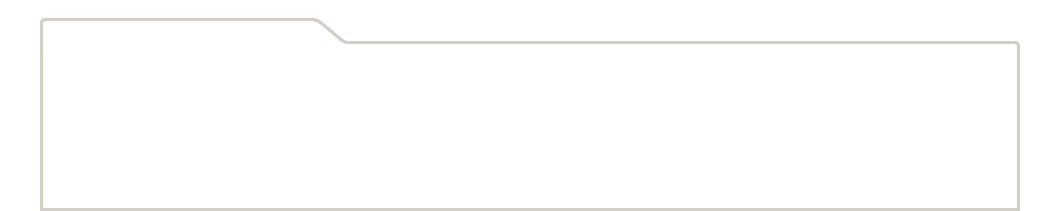
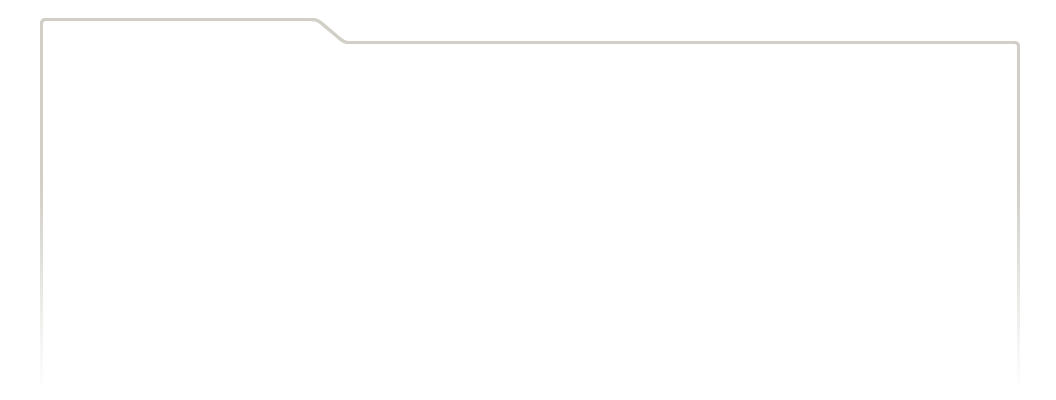
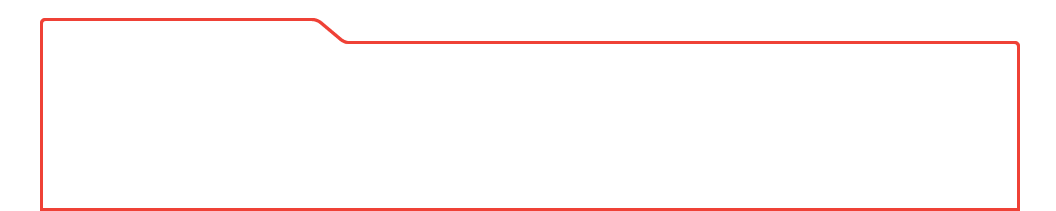
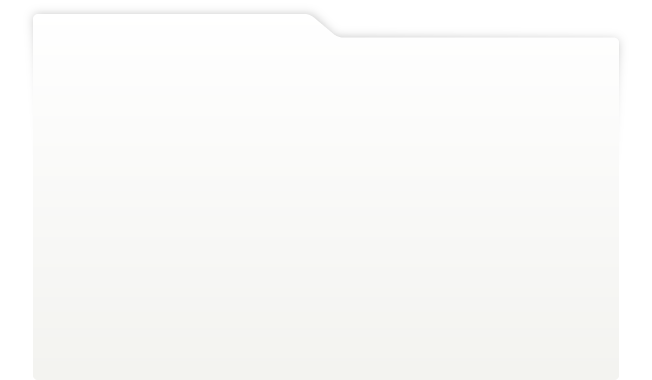
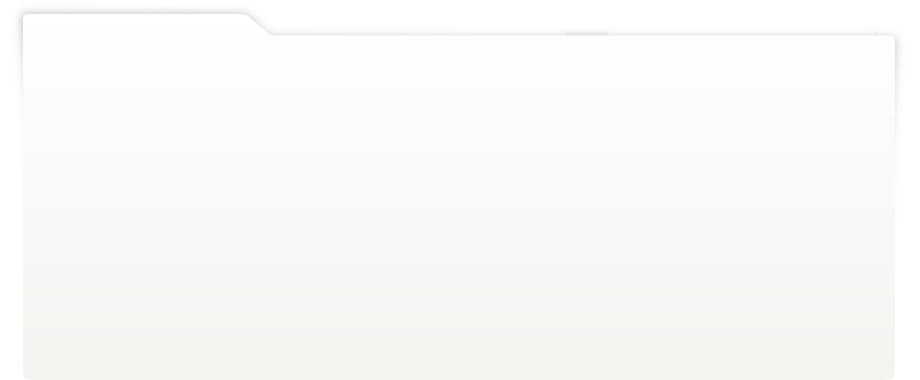
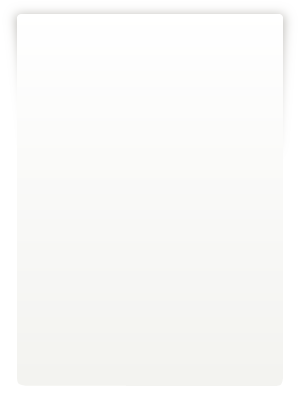
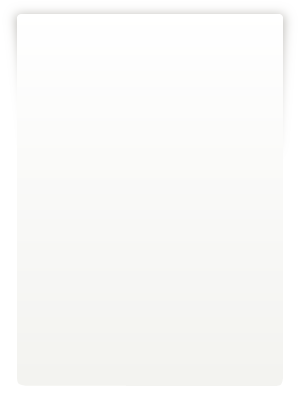
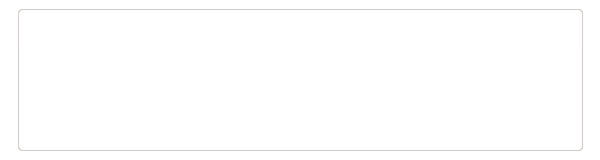
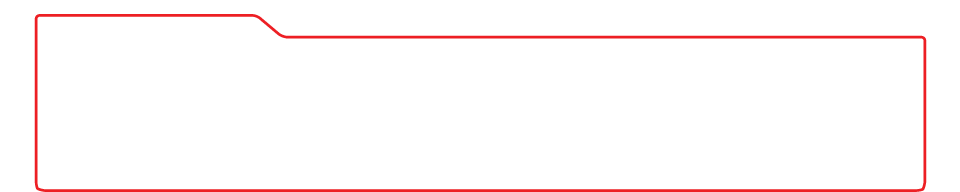
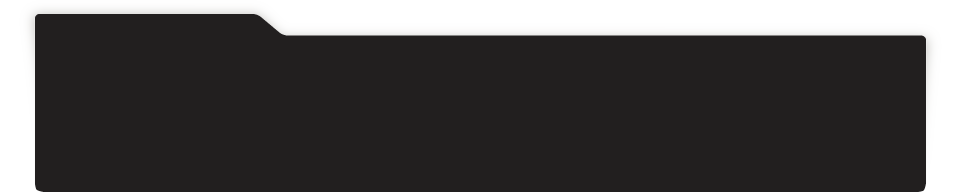
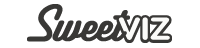
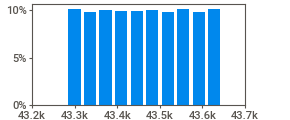
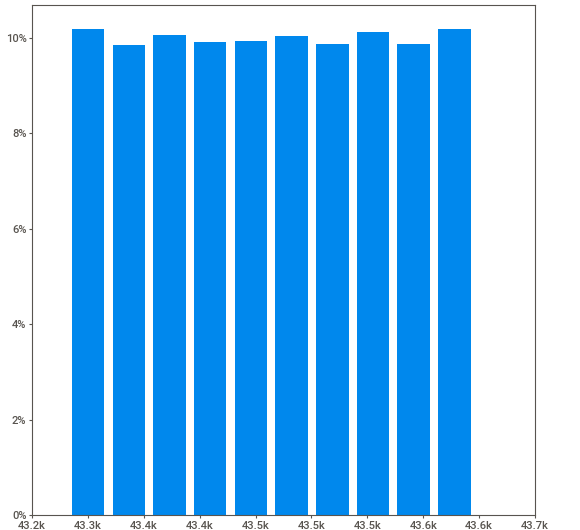
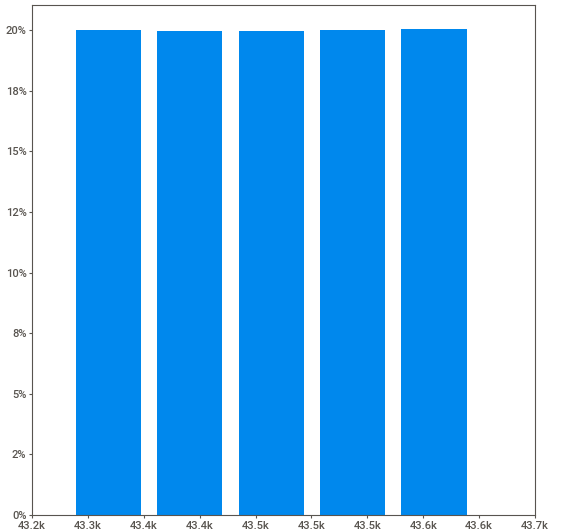
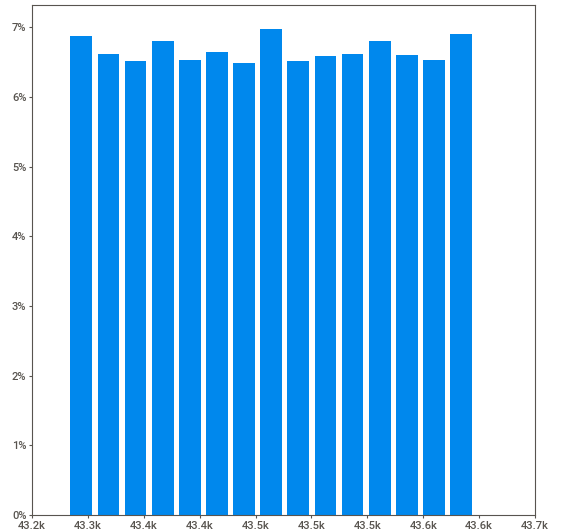
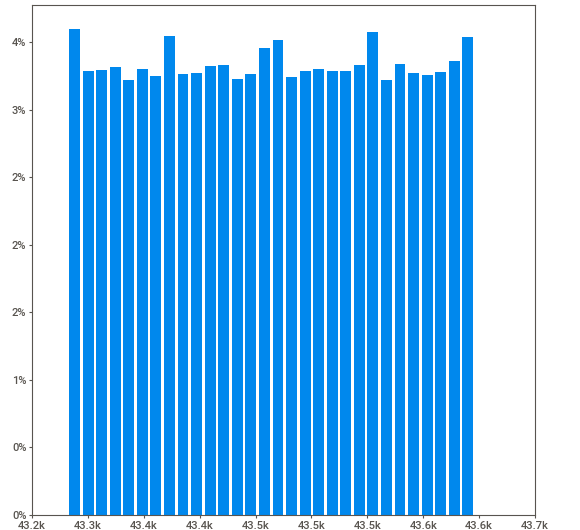
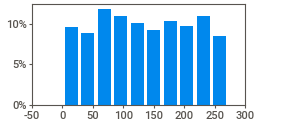
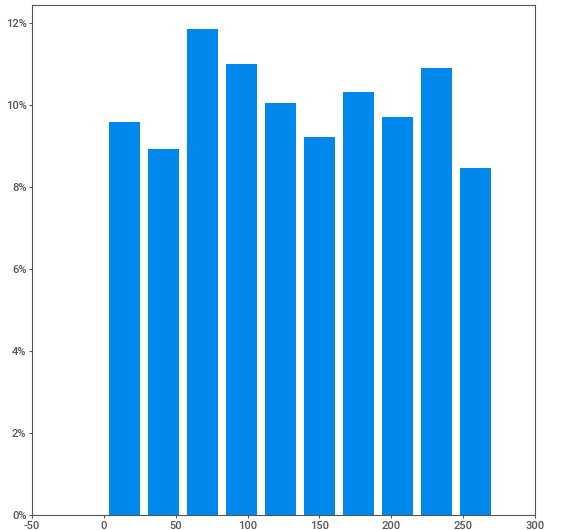
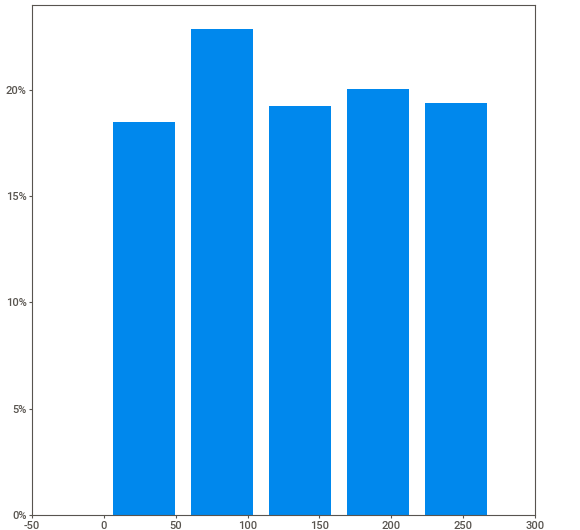
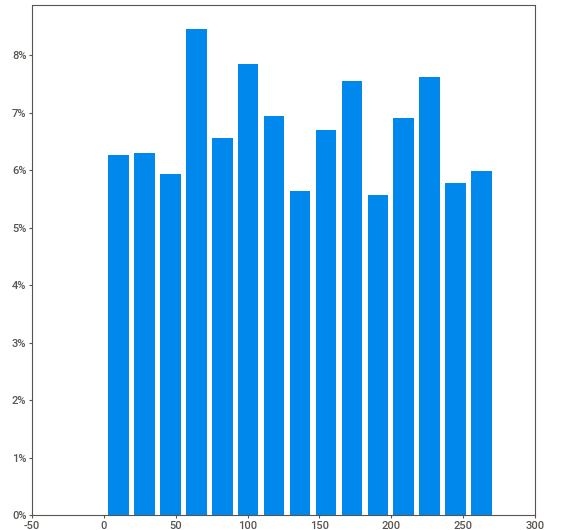
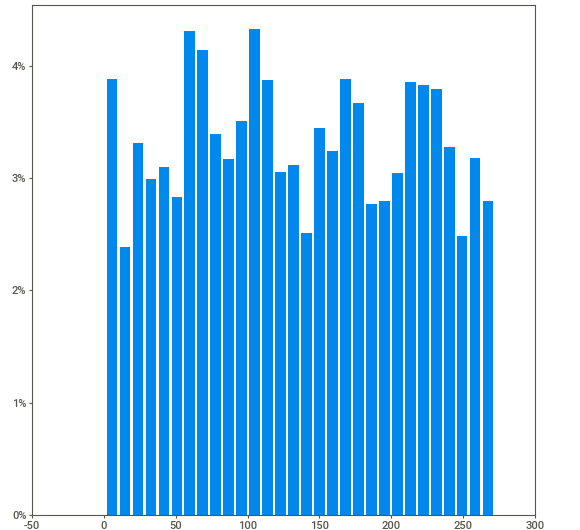
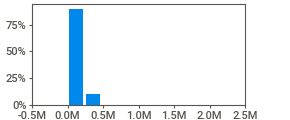
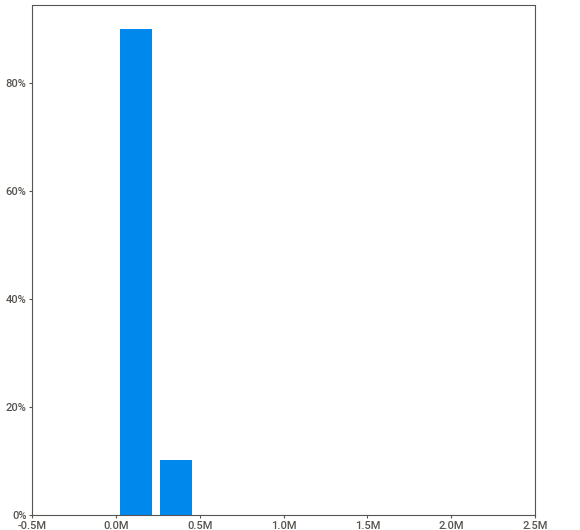
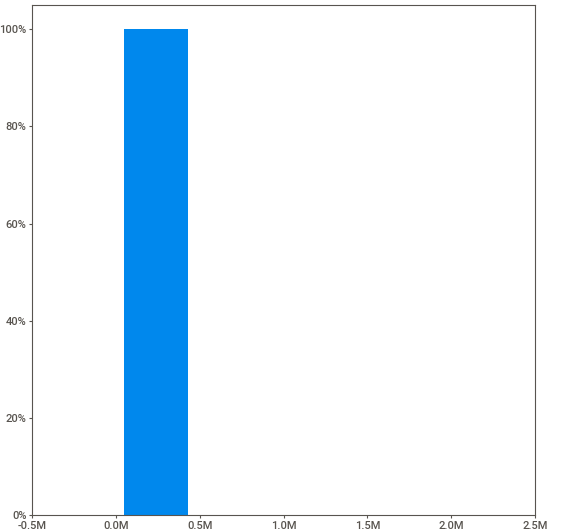
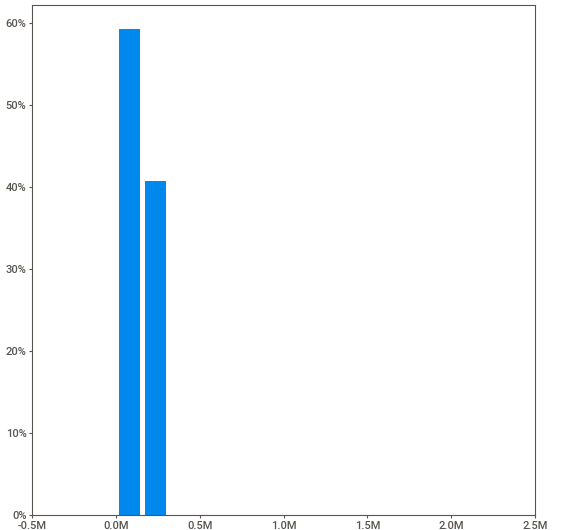
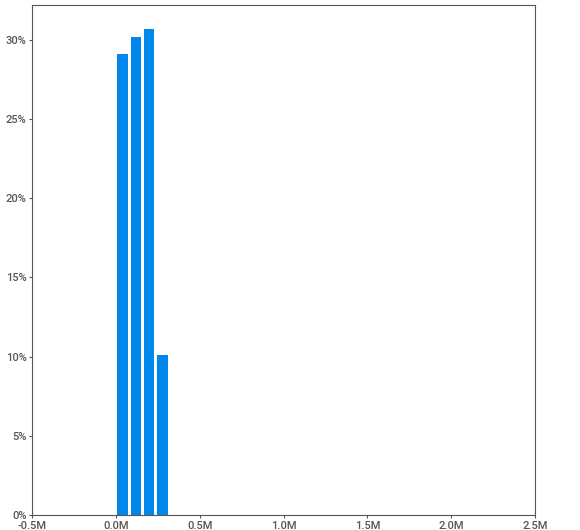
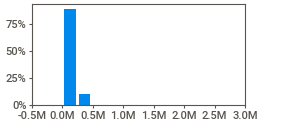
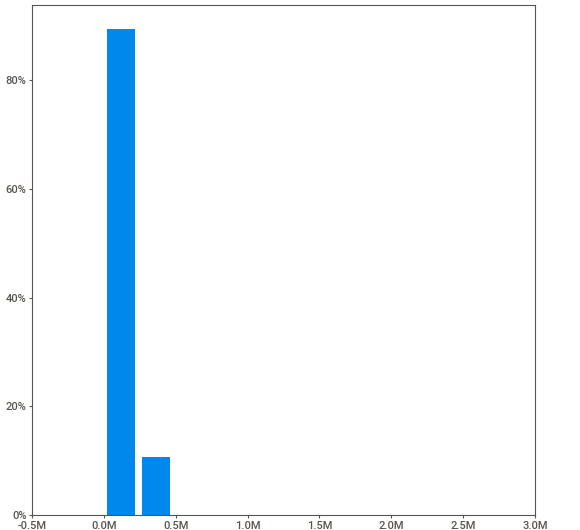
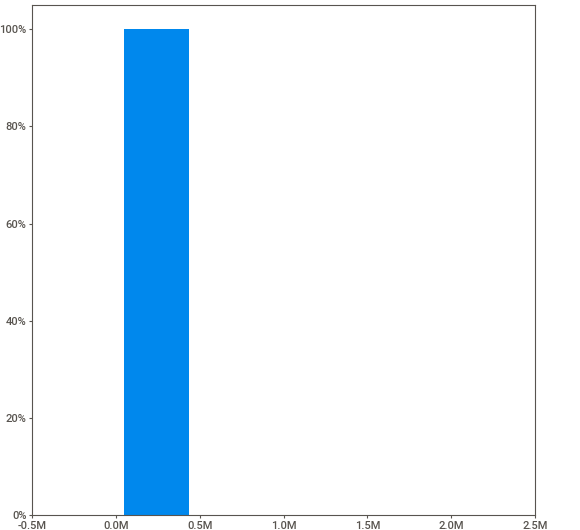
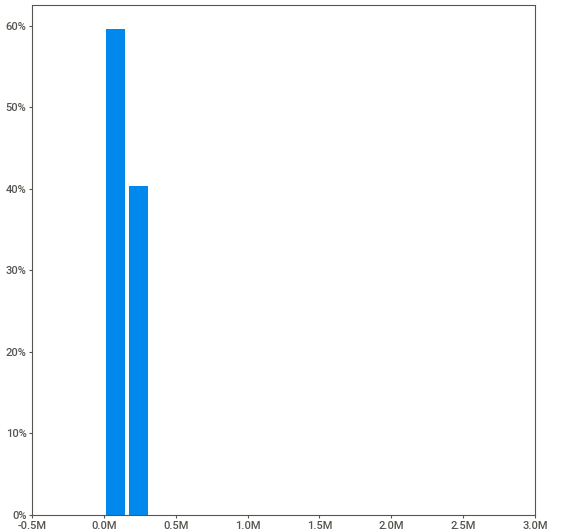
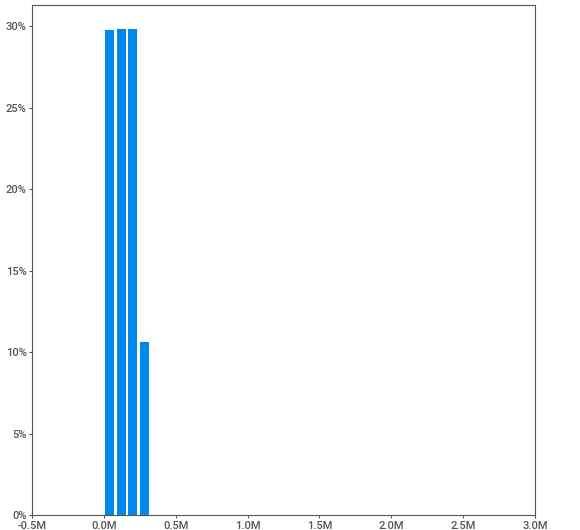
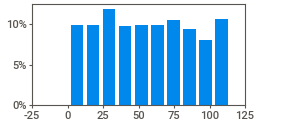
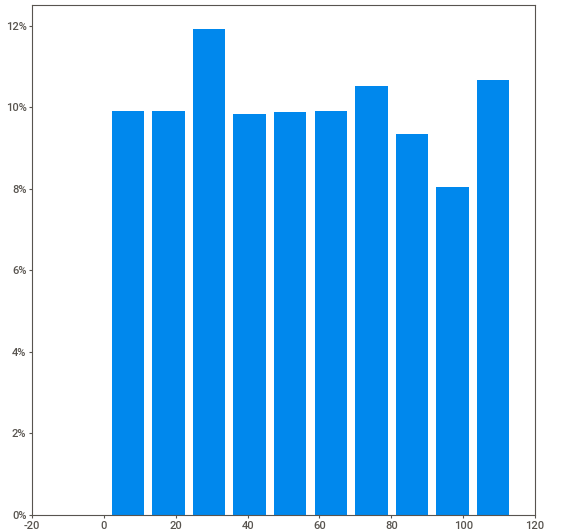
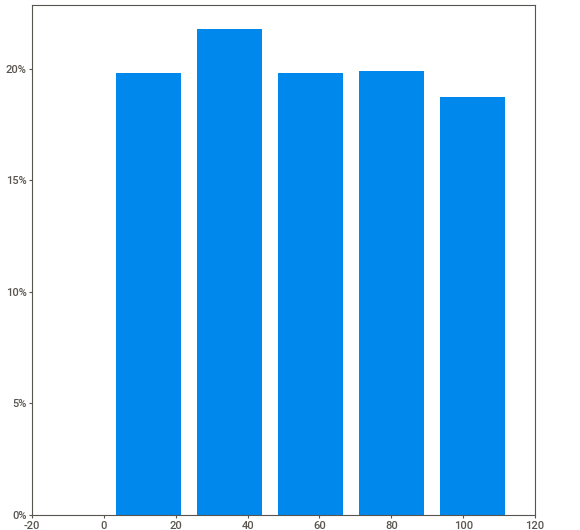
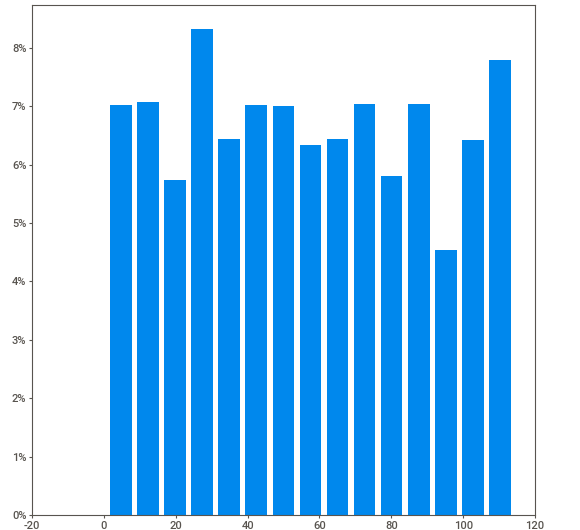
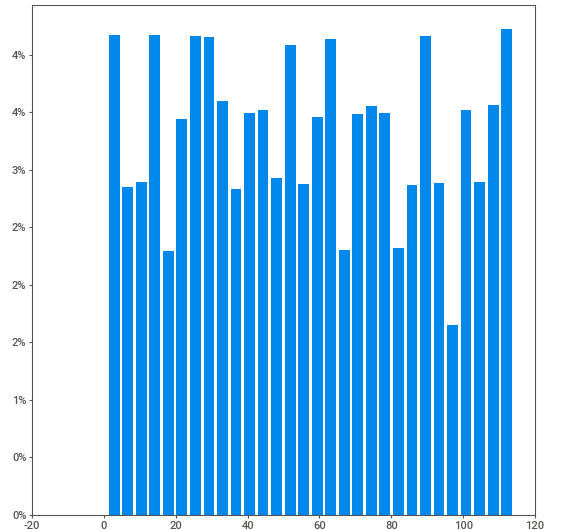
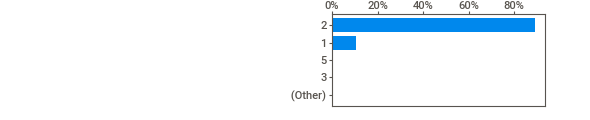
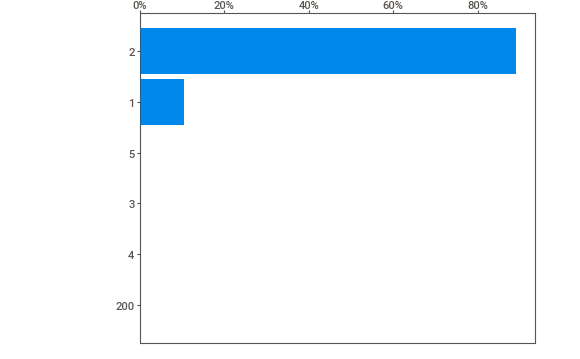
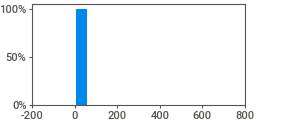
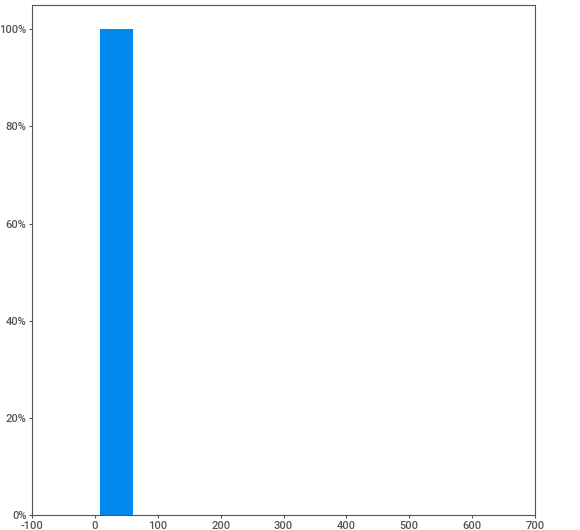
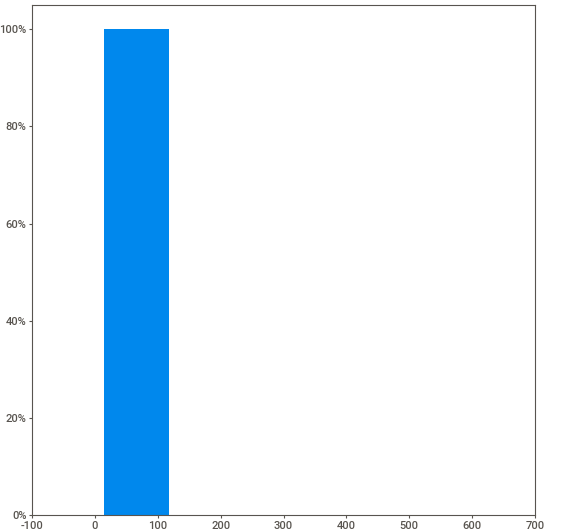
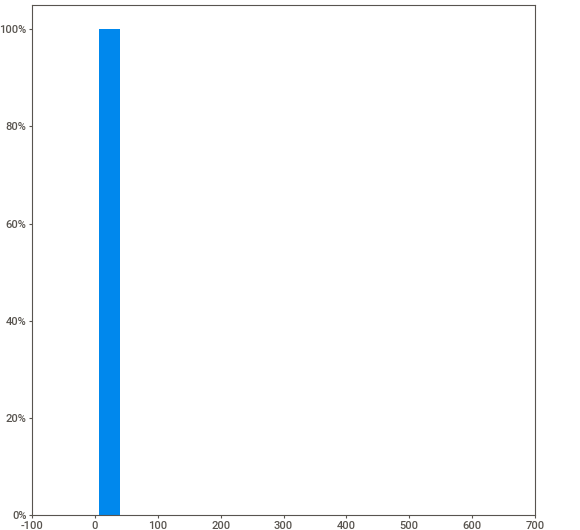
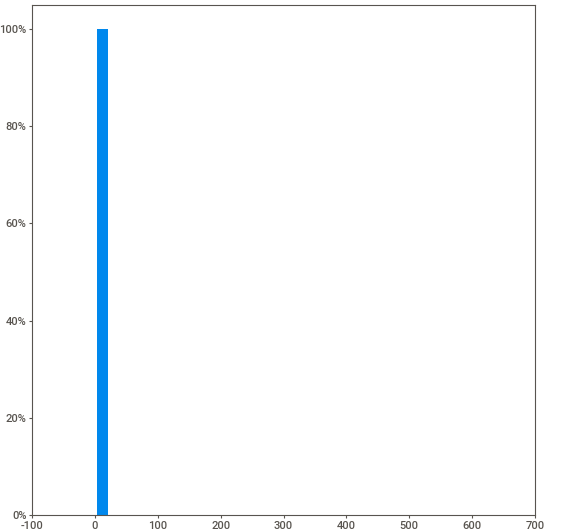
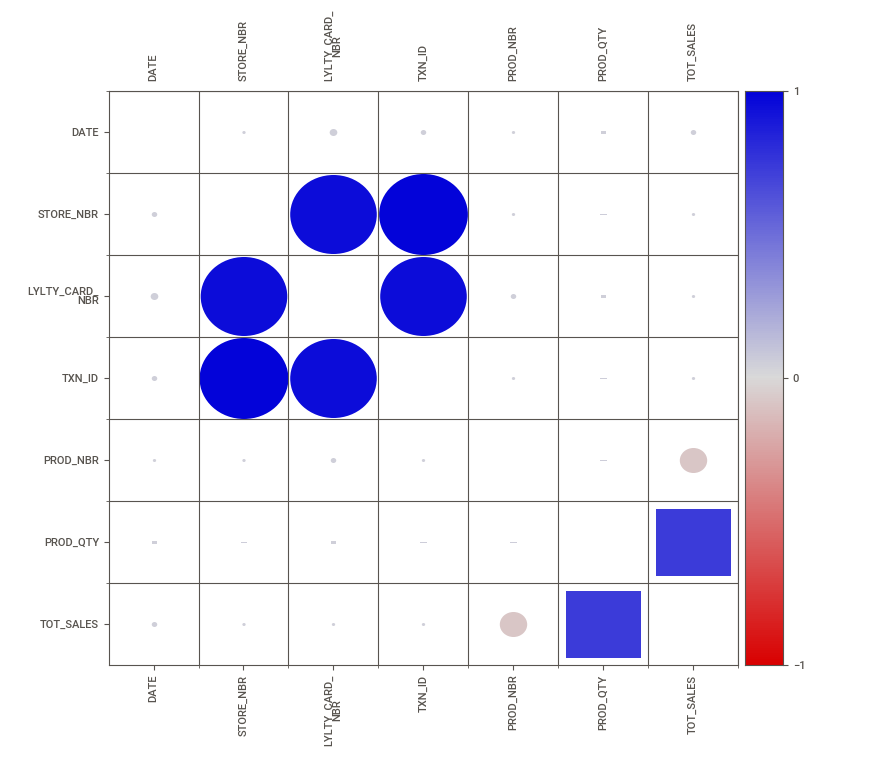
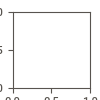

In [12]:
autoEDA = sweetviz.analyze(Trans_data)
autoEDA.show_notebook() 

                                             |                                             | [  0%]   00:00 ->…


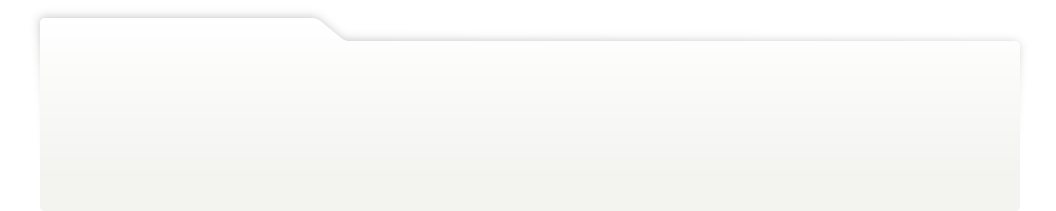
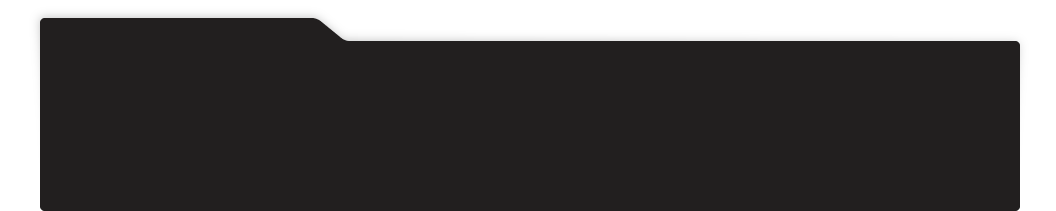
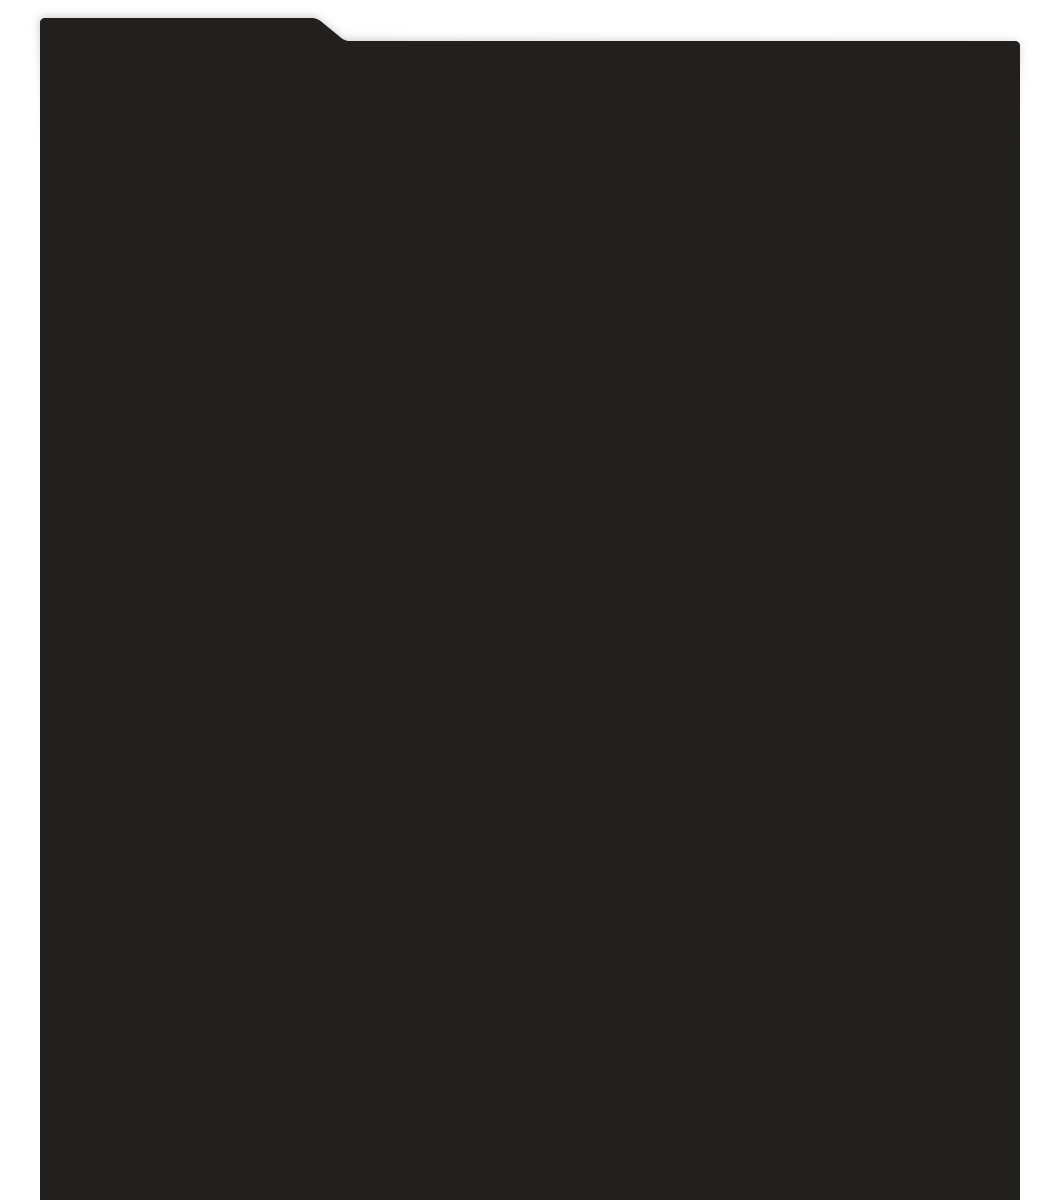
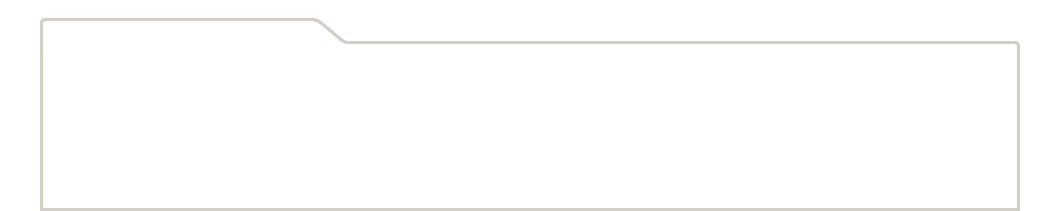
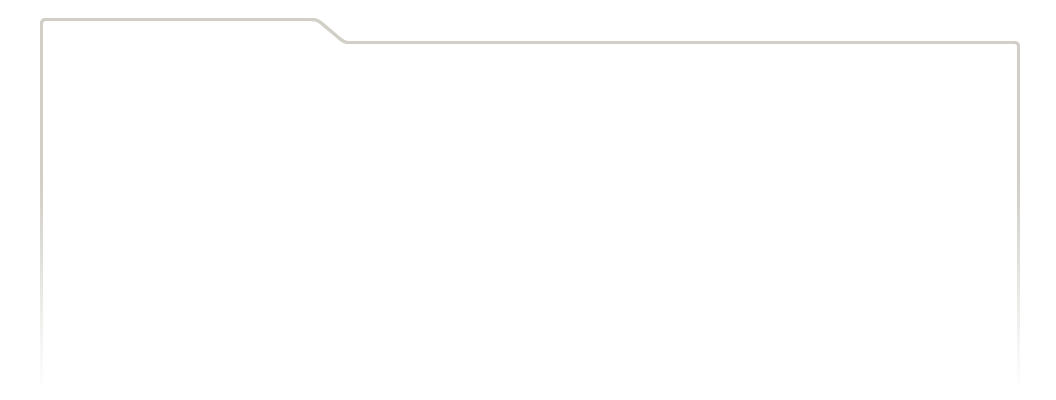
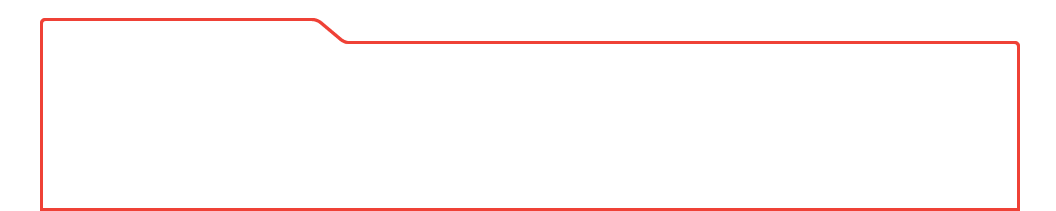
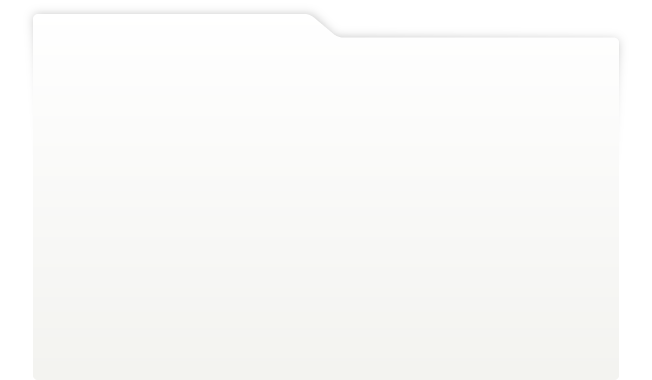
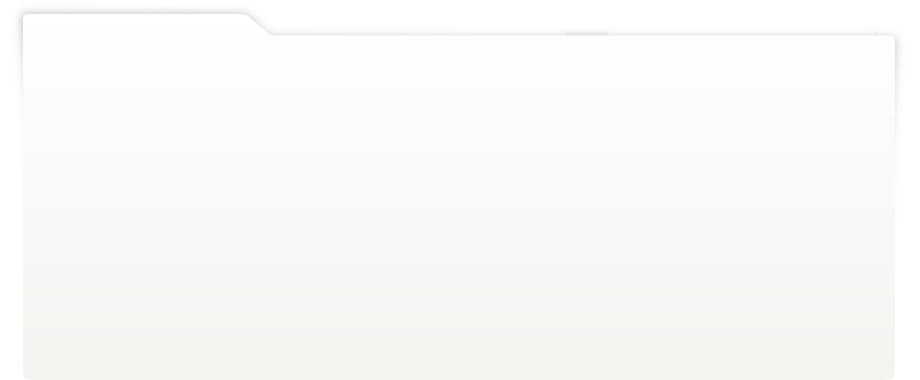
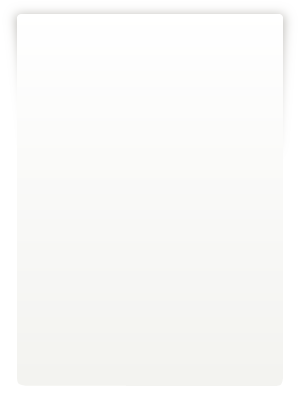
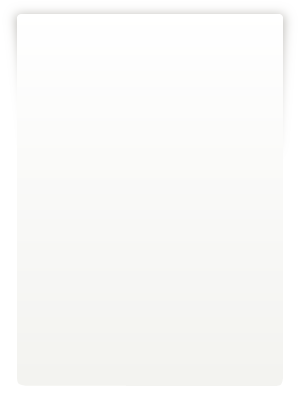
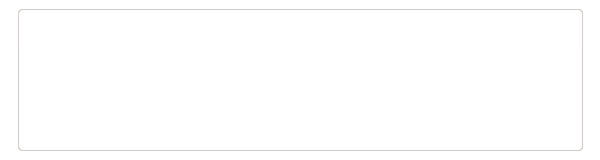
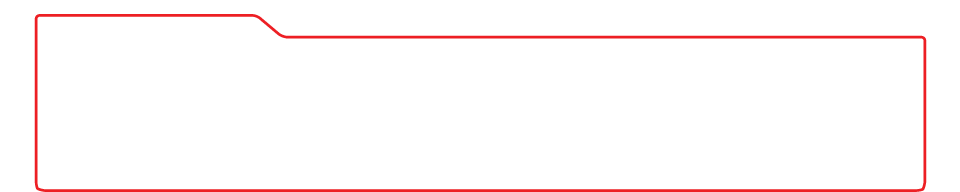
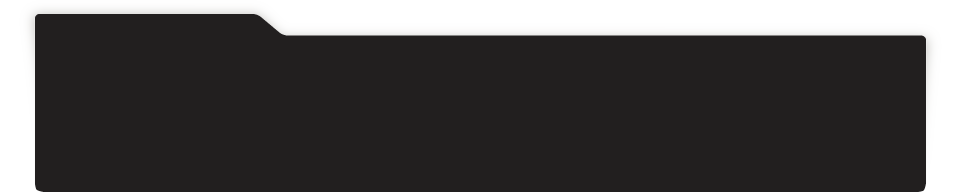
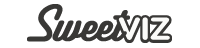
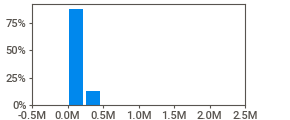
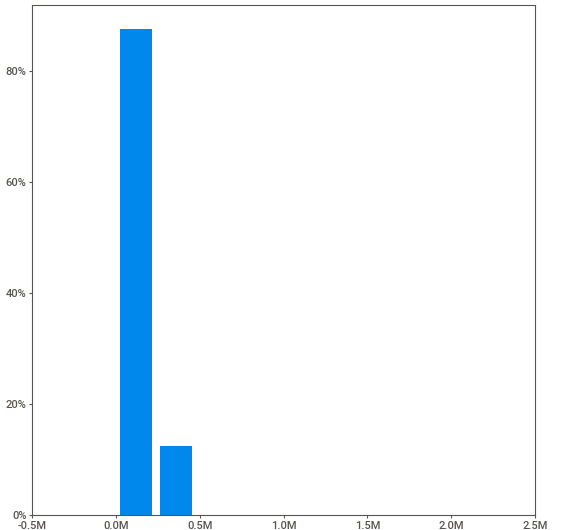
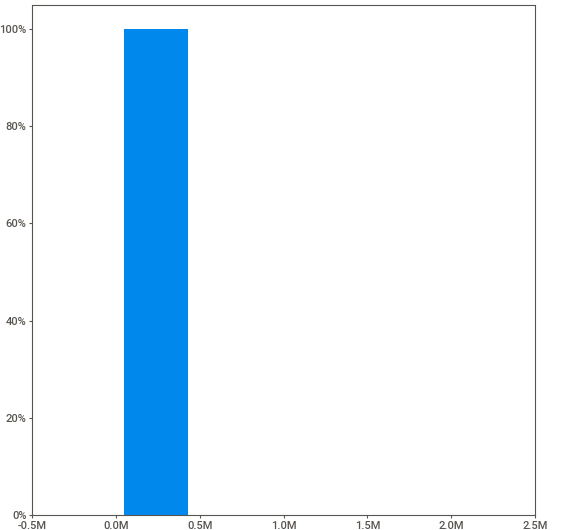
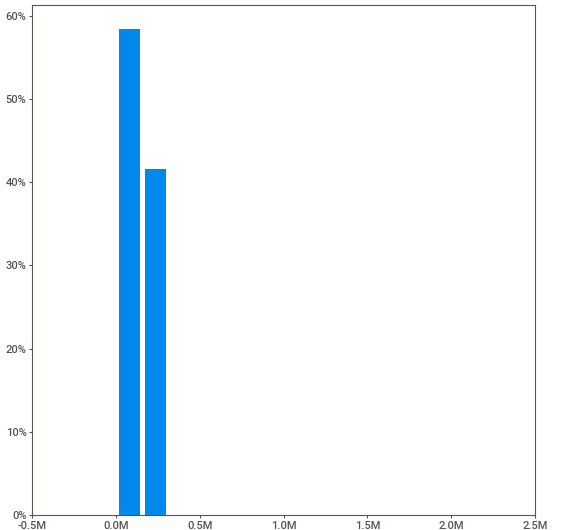
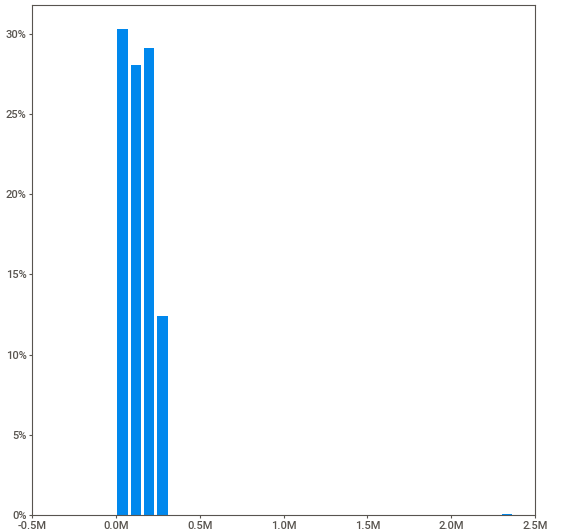
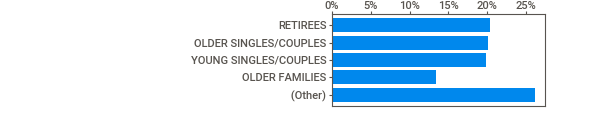
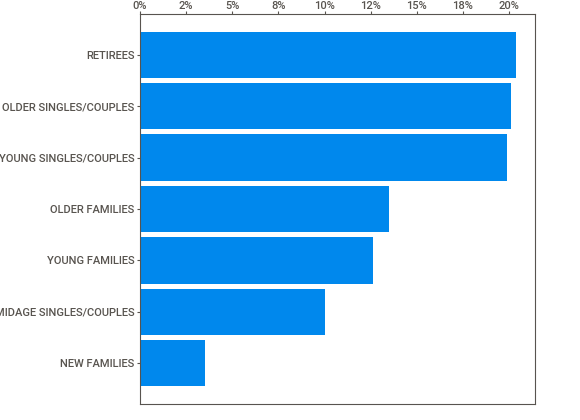
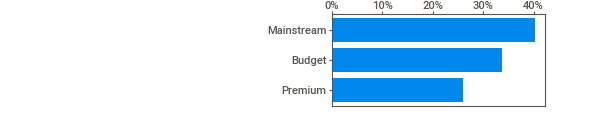
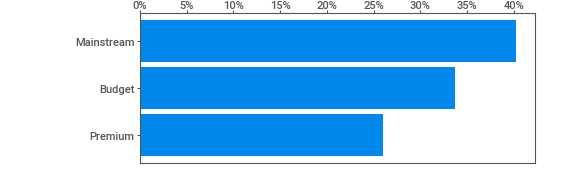
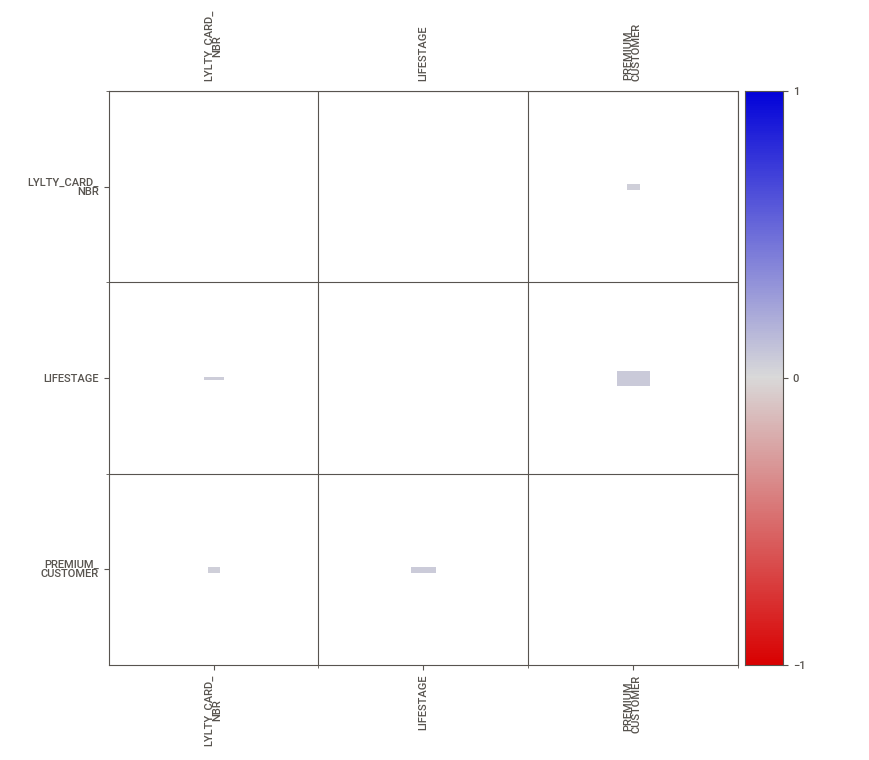
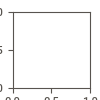

In [13]:
autoEDA = sweetviz.analyze(Cust_data)
autoEDA.show_notebook()

In [7]:
# for understranding customer behaviour this matrics shows
# which customer LIFESTAGE with it's PREMIUM_CUSTOMER 

Segments = ['YOUNG SINGLES/COUPLES','YOUNG FAMILIES','OLDER SINGLES/COUPLES','MIDAGE SINGLES/COUPLES',
        'NEW FAMILIES','OLDER FAMILIES','RETIREES']

metrics = pd.crosstab(Cust_data['LIFESTAGE'], Cust_data['PREMIUM_CUSTOMER'],
                      rownames=['LIFESTAGE'], colnames=['PREMIUM_CUSTOMER'])


metrics

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


In [14]:
dfMerged = pd.merge(Cust_data, Trans_data, left_on='LYLTY_CARD_NBR', right_on='LYLTY_CARD_NBR', how='outer')
dfMerged

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


In [15]:
metrics2 = pd.crosstab(dfMerged['LIFESTAGE'], dfMerged['PREMIUM_CUSTOMER'], values=dfMerged['TOT_SALES'],aggfunc=sum)
print("-----------The describtion of sales----------")
metrics2 

-----------The describtion of sales----------


PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,35514.80,90803.85,58432.65
NEW FAMILIES,21928.45,17013.90,11491.10
OLDER FAMILIES,168363.25,103445.55,81958.40
OLDER SINGLES/COUPLES,136769.80,133393.80,132263.15
RETIREES,113147.80,155677.05,97646.05
YOUNG FAMILIES,139345.85,92788.75,84025.50
YOUNG SINGLES/COUPLES,61141.60,157621.60,41642.10


In [16]:
metrics3 = pd.crosstab(dfMerged['LIFESTAGE'], dfMerged['PROD_NAME'], values=dfMerged['PROD_QTY'],aggfunc=sum).T
metrics3

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PROD_NAME,,,,,,,
Burger Rings 220g,287,70,681,553,492,574,313
CCs Nacho Cheese 175g,304,49,611,463,427,607,378
CCs Original 175g,262,56,597,562,516,566,321
CCs Tasty Cheese 175g,252,63,616,587,454,563,355
Cheetos Chs & Bacon Balls 190g,261,57,602,610,419,536,316
...,...,...,...,...,...,...,...
WW Sour Cream &OnionStacked Chips 160g,280,57,630,547,458,489,341
WW Supreme Cheese Corn Chips 200g,266,61,637,563,438,546,326
Woolworths Cheese Rings 190g,236,63,674,538,441,584,336
